In [47]:
# Importing the necessary libraries

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from collections import Counter
import pandas as pd

In [29]:
# Loading data files
# Trump inaugural speech
trump = "data/trump-r-2017.txt"

# Obama inaugural Speech
obama = "data/obama-d-2013.txt"

# Bush inaugural speech
bush = "data/bush-r-2001.txt"

# Regan inaugural speech
reagan = "data/regan-r-1981.txt"

# Kennedy inaugural speech
kennedy = "data/kennedy-d-1961.txt"

# Roosevelt 3rd inaugural speech
roosevelt = "data/roosevelt-d-1941.txt"


democrats = ["obama", "kennedy", "roosevelt"]
republican = ["trump", "regan", "bush"]

In [30]:
# Read txt file and store
with open(trump, 'r') as file:
    trump_txt = file.read().replace('\n', '')
    
with open(obama, 'r') as file:
    obama_txt = file.read().replace('\n', '')
    
with open(bush, 'r') as file:
    bush_txt = file.read().replace('\n', '')
    
with open(regan, 'r') as file:
    reagan_txt = file.read().replace('\n', '')
    
with open(kennedy, 'r') as file:
    kennedy_txt = file.read().replace('\n', '')
    
with open(roosevelt, 'r') as file:
    roosevelt_txt = file.read().replace('\n', '')

### Number of Sentences, words, character in the document

In [ ]:
import nltk
nltk.download('punkt')

In [15]:
from nltk.tokenize import sent_tokenize, RegexpTokenizer

In [24]:
# Trump

trump_sent = sent_tokenize(trump_txt)
# Using regex tokenizer because nltk word toknizer considering punctuation as words
trump_word = RegexpTokenizer(r'\w+').tokenize(trump_txt)
trump_char = trump_txt.translate(str.maketrans('', '', string.punctuation))

print(f"Trump Speech total sentence length:{len(trump_sent)}")
print(f"Trump Speech total word length:{len(trump_word)}")
print(f"Trump Speech total character length:{len(trump_char)}")

Trump Speech sentence length:59
Trump Speech sentence length:1468
Trump Speech sentence length:8158


In [34]:
# Obama

obama_sent = sent_tokenize(obama_txt)
# Using regex tokenizer because nltk word toknizer considering punctuation as words
obama_word = RegexpTokenizer(r'\w+').tokenize(obama_txt)
obama_char = obama_txt.translate(str.maketrans('', '', string.punctuation))


print(f"Obama Speech sentence length:{len(obama_sent)}")
print(f"Obama Speech word length:{len(obama_word)}")
print(f"Obama Speech character length:{len(obama_char)}")

Obama Speech sentence length:63
Obama Speech word length:2125
Obama Speech character length:11659


In [35]:
# Bush

bush_sent = sent_tokenize(bush_txt)
# Using regex tokenizer because nltk word toknizer considering punctuation as words
bush_word = RegexpTokenizer(r'\w+').tokenize(bush_txt)
bush_char = bush_txt.translate(str.maketrans('', '', string.punctuation))


print(f"Bush Speech sentence length:{len(bush_sent)}")
print(f"Bush Speech word length:{len(bush_word)}")
print(f"Bush Speech character length:{len(bush_char)}")

Bush Speech sentence length:68
Bush Speech word length:1602
Bush Speech character length:8758


In [37]:
# Reagan

reagan_sent = sent_tokenize(reagan_txt)
# Using regex tokenizer because nltk word toknizer considering punctuation as words
reagan_word = RegexpTokenizer(r'\w+').tokenize(reagan_txt)
reagan_char = reagan_txt.translate(str.maketrans('', '', string.punctuation))


print(f"Reagan Speech sentence length:{len(reagan_sent)}")
print(f"Reagan Speech word length:{len(reagan_word)}")
print(f"Reagan Speech character length:{len(reagan_char)}")

Reagan Speech sentence length:99
Reagan Speech word length:2454
Reagan Speech character length:13296


In [38]:
# Kennedy

kennedy_sent = sent_tokenize(kennedy_txt)
# Using regex tokenizer because nltk word toknizer considering punctuation as words
kennedy_word = RegexpTokenizer(r'\w+').tokenize(kennedy_txt)
kennedy_char = kennedy_txt.translate(str.maketrans('', '', string.punctuation))


print(f"Kennedy Speech sentence length:{len(kennedy_sent)}")
print(f"Kennedy Speech word length:{len(kennedy_word)}")
print(f"Kennedy Speech character length:{len(kennedy_char)}")

Kennedy Speech sentence length:30
Kennedy Speech word length:1368
Kennedy Speech character length:7316


In [39]:
# Roosevelt

roosevelt_sent = sent_tokenize(roosevelt_txt)
# Using regex tokenizer because nltk word toknizer considering punctuation as words
roosevelt_word = RegexpTokenizer(r'\w+').tokenize(roosevelt_txt)
roosevelt_char = roosevelt_txt.translate(str.maketrans('', '', string.punctuation))


print(f"Roosevelt Speech sentence length:{len(roosevelt_sent)}")
print(f"Roosevelt Speech word length:{len(roosevelt_word)}")
print(f"Roosevelt Speech character length:{len(roosevelt_char)}")

Roosevelt Speech sentence length:38
Roosevelt Speech word length:1362
Roosevelt Speech character length:7370


In [41]:
# Create dictionary of all sentence count
sentence_count = {"trump": len(trump_sent),
                 "obama": len(obama_sent),
                 "bush": len(bush_sent),
                 "reagan": len(reagan_sent),
                 "kennedy": len(kennedy_sent), 
                 "roosevelt": len(roosevelt_sent)}

In [65]:
# convert dictionary into dataframe, this will helps to make some more analysis in later stage
sent_df = pd.DataFrame(sentence_count.items(), columns=["presidents", "sent_count"])

In [59]:
# set size of the chart
sns.set(rc={"figure.figsize":(12, 10)})

<AxesSubplot:xlabel='presidents', ylabel='sent_count'>

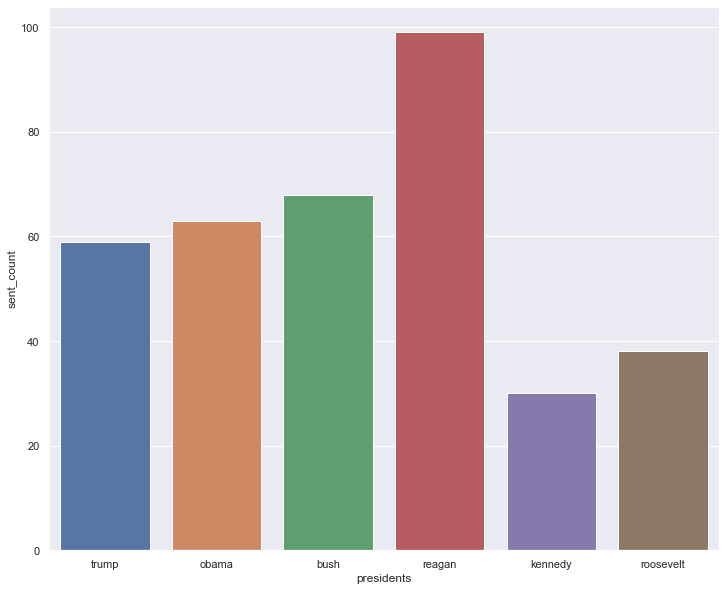

In [67]:
# Bar chart
sns.barplot(x="presidents", y="sent_count", data=sent_df)

In [69]:
# Create dictionary of all word count
word_count = {"trump": len(trump_word),
                 "obama": len(obama_word),
                 "bush": len(bush_word),
                 "reagan": len(reagan_word),
                 "kennedy": len(kennedy_word), 
                 "roosevelt": len(roosevelt_word)}

In [70]:
word_df = pd.DataFrame(word_count.items(), columns=["presidents", "word_count"])

<AxesSubplot:xlabel='presidents', ylabel='word_count'>

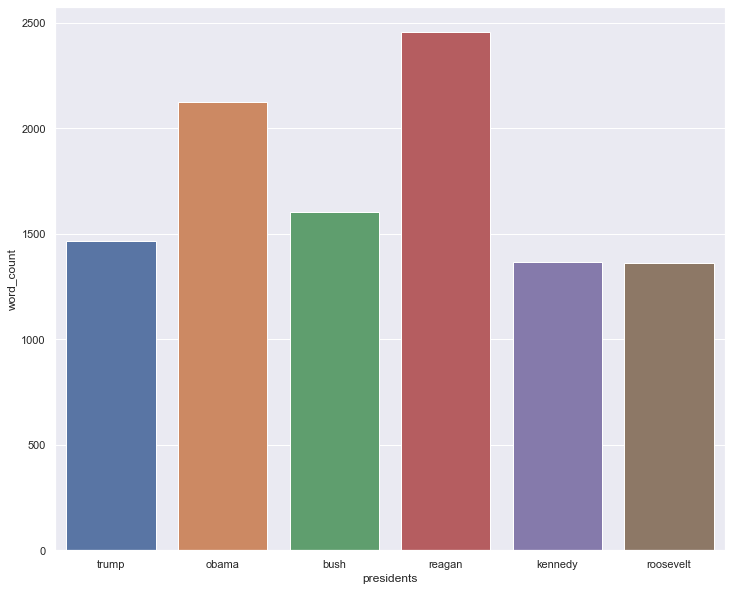

In [71]:
sns.barplot(x="presidents", y="word_count", data=word_df)

In [72]:
# Create dictionary of all char count
char_count = {"trump": len(trump_char),
                 "obama": len(obama_char),
                 "bush": len(bush_char),
                 "reagan": len(reagan_char),
                 "kennedy": len(kennedy_char), 
                 "roosevelt": len(roosevelt_char)}

In [79]:
char_df = pd.DataFrame(char_count.items(), columns=["presidents", "char_count"])

<AxesSubplot:xlabel='presidents', ylabel='char_count'>

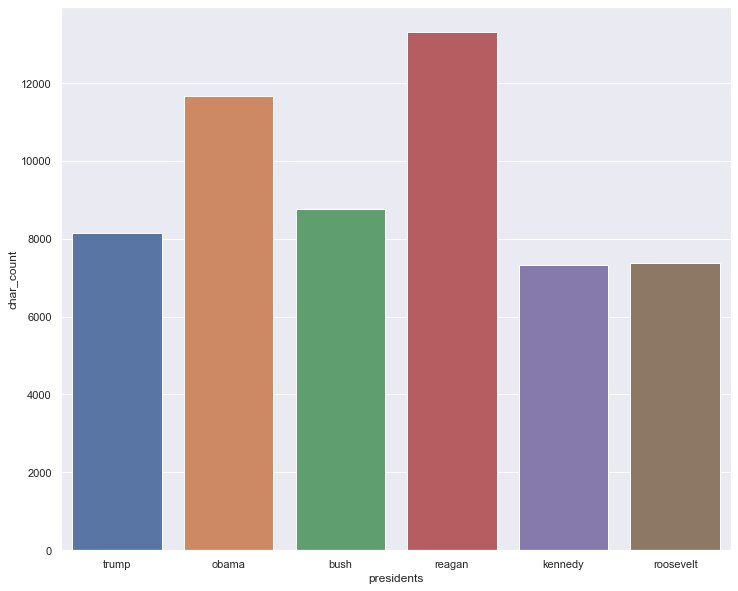

In [80]:
sns.barplot(x="presidents", y="char_count", data=char_df)

In [81]:
count_df = sent_df.merge(word_df,on='presidents').merge(char_df,on='presidents')

In [82]:
count_df

presidents  sent_count  word_count  char_count
0      trump          59        1468        8158
1      obama          63        2125       11659
2       bush          68        1602        8758
3     reagan          99        2454       13296
4    kennedy          30        1368        7316
5  roosevelt          38        1362        7370

In [94]:
# Create dictionary of all text
text = {"trump": trump_txt,
                 "obama": obama_txt,
                 "bush": bush_txt,
                 "reagan": reagan_txt,
                 "kennedy": kennedy_txt, 
                 "roosevelt": roosevelt_txt}

In [95]:
text_df = pd.DataFrame(text.items(), columns=["presidents", "text"])

In [96]:
df = count_df.merge(text_df,on='presidents')

In [97]:
df.head()

presidents  sent_count  word_count  char_count  \
0      trump          59        1468        8158   
1      obama          63        2125       11659   
2       bush          68        1602        8758   
3     reagan          99        2454       13296   
4    kennedy          30        1368        7316   

                                                text  
0  Chief Justice Roberts, President Carter, Presi...  
1  Thank you. Thank you so much.Vice President Bi...  
2  Thank you, all. Chief Justice Rehnquist, Presi...  
3  Senator Hatfield, Mr. Chief Justice, Mr. Presi...  
4  Vice President Johnson, Mr. Speaker, Mr. Chief...

### Word Cloud

In [84]:
# Word cloud for Trump

trump_word_cloud = WordCloud(width= 3000, height = 2000,
                              random_state=1,
                              colormap='Pastel1',
                              collocations=False, 
                              stopwords = STOPWORDS).generate(trump_txt)

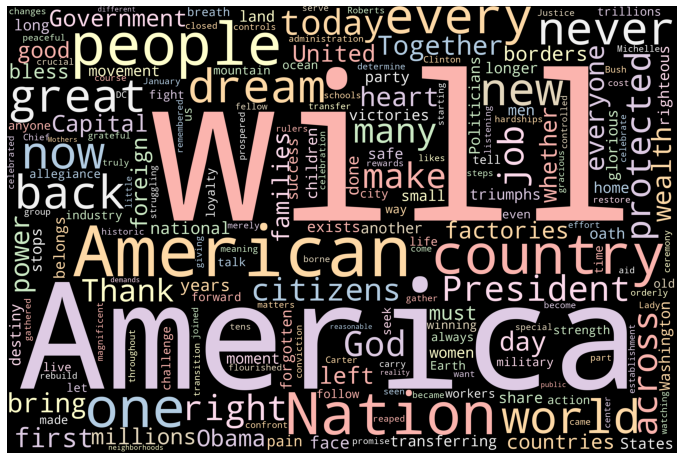

In [92]:
plt.axis("off")
plt.imshow(trump_word_cloud)

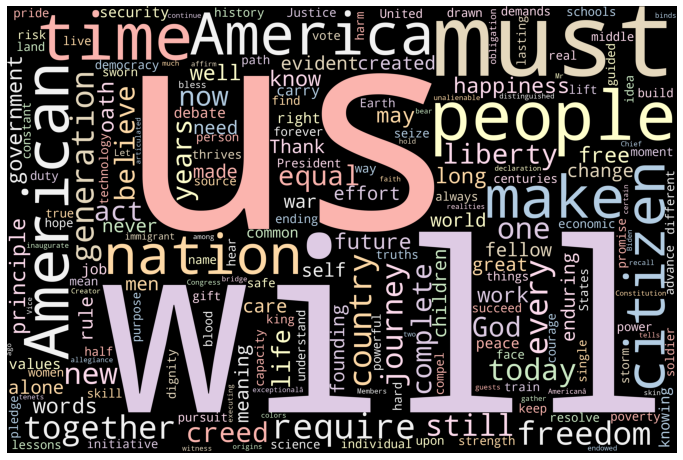

In [86]:
# Word cloud for Obama

obama_word_cloud = WordCloud(width= 3000, height = 2000,
                              random_state=1,
                              colormap='Pastel1',
                              collocations=False, 
                              stopwords = STOPWORDS).generate(obama_txt)

plt.axis("off")
plt.imshow(obama_word_cloud)

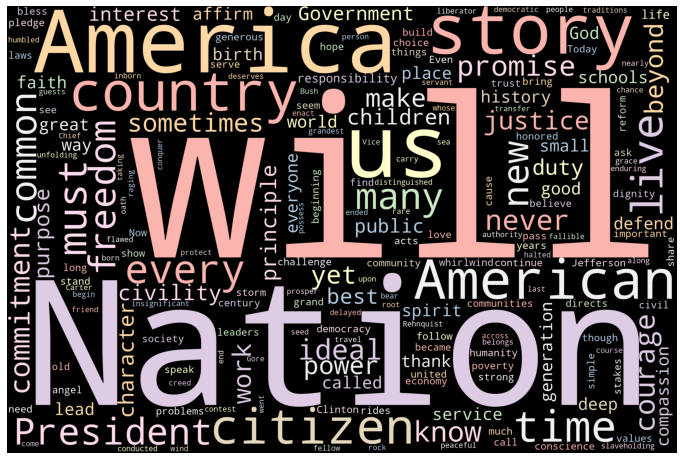

In [87]:
# Word cloud for bush

bush_word_cloud = WordCloud(width= 3000, height = 2000,
                              random_state=1,
                              colormap='Pastel1',
                              collocations=False, 
                              stopwords = STOPWORDS).generate(bush_txt)

plt.axis("off")
plt.imshow(bush_word_cloud)

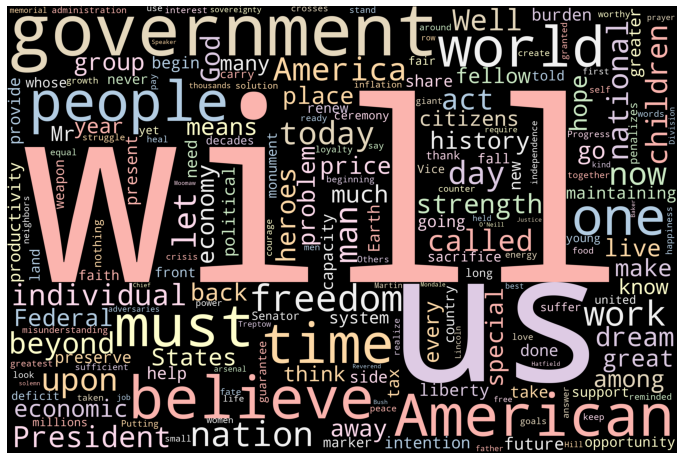

In [88]:
# Word cloud for reagan

reagan_word_cloud = WordCloud(width= 3000, height = 2000,
                              random_state=1,
                              colormap='Pastel1',
                              collocations=False, 
                              stopwords = STOPWORDS).generate(reagan_txt)

plt.axis("off")
plt.imshow(reagan_word_cloud)

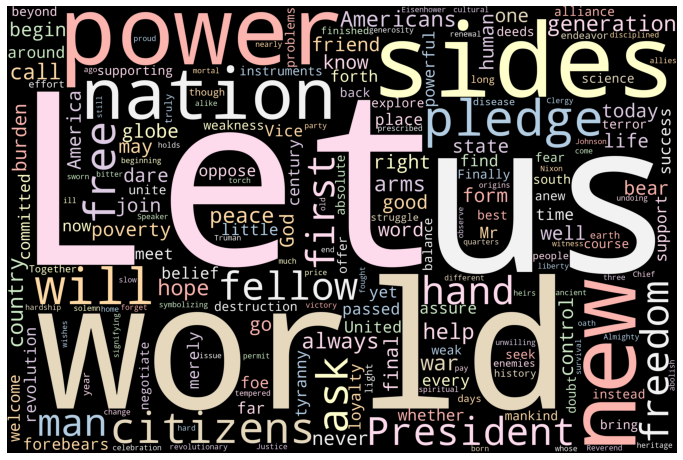

In [89]:
# Word cloud for kennedy

kennedy_word_cloud = WordCloud(width= 3000, height = 2000,
                              random_state=1,
                              colormap='Pastel1',
                              collocations=False, 
                              stopwords = STOPWORDS).generate(kennedy_txt)

plt.axis("off")
plt.imshow(kennedy_word_cloud)

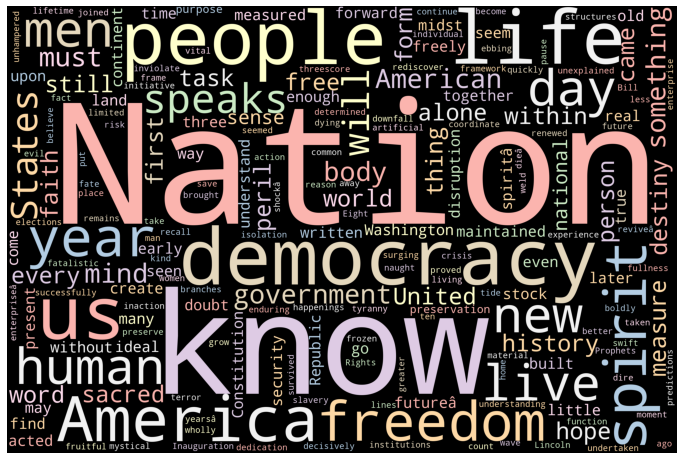

In [90]:
# Word cloud for Roosevelt

roosevelt_word_cloud = WordCloud(width= 3000, height = 2000,
                              random_state=1,
                              colormap='Pastel1',
                              collocations=False, 
                              stopwords = STOPWORDS).generate(roosevelt_txt)

plt.axis("off")
plt.imshow(roosevelt_word_cloud)

### Sentiment Analysis

In [100]:
# using text blob package we can able to determine the sentiment of the given text
from textblob import TextBlob

In [101]:
# Lambda function to calculate sentiment polarity and subjectivity

polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

In [102]:
df["polarity"] = df["text"].apply(polarity)
df["subjectivity"] = df["text"].apply(subjectivity)

In [103]:
# we didn't do any pre-process on the data
df

presidents  sent_count  word_count  char_count  \
0      trump          59        1468        8158   
1      obama          63        2125       11659   
2       bush          68        1602        8758   
3     reagan          99        2454       13296   
4    kennedy          30        1368        7316   
5  roosevelt          38        1362        7370   

                                                text  polarity  subjectivity  
0  Chief Justice Roberts, President Carter, Presi...  0.173183      0.414621  
1  Thank you. Thank you so much.Vice President Bi...  0.117825      0.451375  
2  Thank you, all. Chief Justice Rehnquist, Presi...  0.181847      0.470574  
3  Senator Hatfield, Mr. Chief Justice, Mr. Presi...  0.187532      0.459881  
4  Vice President Johnson, Mr. Speaker, Mr. Chief...  0.152034      0.511875  
5  On each national day of Inauguration since 178...  0.142115      0.453954